# Horizontal and vertical derivatives

In [1]:
# Copying all usefull libraries
import numpy as np
import gravmag as gmc
import auxiliars as aux
import datafiltering as df
import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic Magnetic data

In [2]:
# Definition for number of points and grid creation
npts = 500
x = np.linspace(-3000., 3000., npts)
y = np.copy(x)
z = -100.

# Creat the grid file
X, Y = np.meshgrid(x, y)

In [3]:
#Informations about the rectangular prisms that we will use
prism = [-500., 500., -500., 500., 10., 1010., 3.]

# Informations about the values for inclination and declination
direc = [-30., 40.]
#field = [55., -48.]

In [4]:
# Calculate the total field anomaly
tf = gmc.prism_tf(X, Y, z, prism, direc, direc)
tfa = aux.addnoise(tf, 0.1)

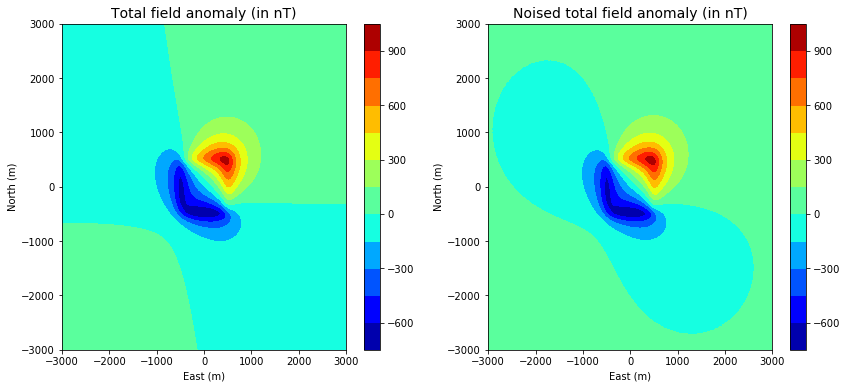

In [6]:
# Plotting the total field anomaly
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Total field anomaly (in nT)', fontsize = 14)
plt.contourf(Y, X, tf, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('Noised total field anomaly (in nT)', fontsize = 14)
plt.contourf(Y, X, tfa, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()

In [7]:
# Calculating the first order horizontal derivative in X direction
derivx = df.xderiv(x, y, tf, 1.)

# Calculating the first order horizontal derivative in Y direction
derivy = df.yderiv(x, y, tf, 1.)

# Calculating the first order vertical derivative in Z direction
derivz = df.zderiv(x, y, tf, 1.)

In [8]:
# Calculating the numerical derivative
delta = 10.
# In X
xi = gmc.prism_tf(X - delta, Y, z, prism, direc, direc)
xf = gmc.prism_tf(X + delta, Y, z, prism, direc, direc)
diffx = (xf - xi)/(2.*delta)

# In Y
yi = gmc.prism_tf(X, Y - delta, z, prism, direc, direc)
yf = gmc.prism_tf(X, Y + delta, z, prism, direc, direc)
diffy = (yf - yi)/(2.*delta)

# In X
zi = gmc.prism_tf(X, Y, z - 0.1*delta, prism, direc, direc)
zf = gmc.prism_tf(X, Y, z + 0.1*delta, prism, direc, direc)
diffz = (zf - zi)/(2.*0.1*delta)

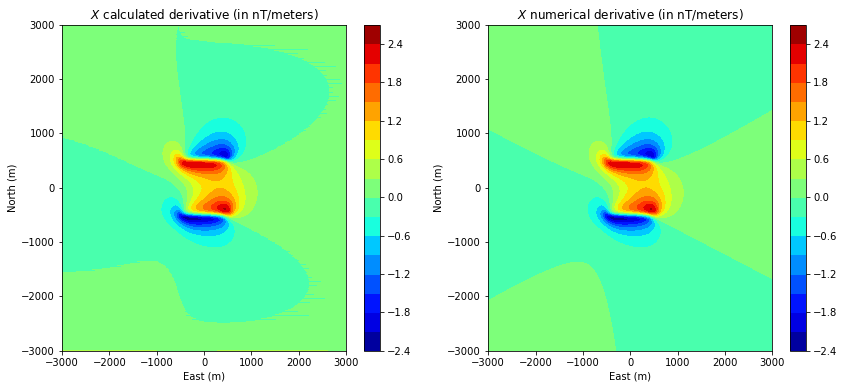

In [9]:
# Plotting the results for x derivative
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title('$X$ calculated derivative (in nT/meters)')
plt.contourf(Y, X, derivx, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('$X$ numerical derivative (in nT/meters)')
plt.contourf(Y, X, diffx, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()

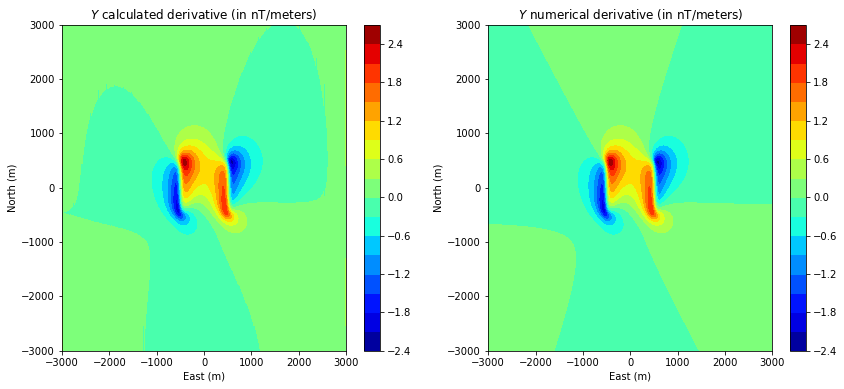

In [10]:
# Plotting the results for y derivative
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title('$Y$ calculated derivative (in nT/meters)')
plt.contourf(Y, X, derivy, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('$Y$ numerical derivative (in nT/meters)')
plt.contourf(Y, X, diffy, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()

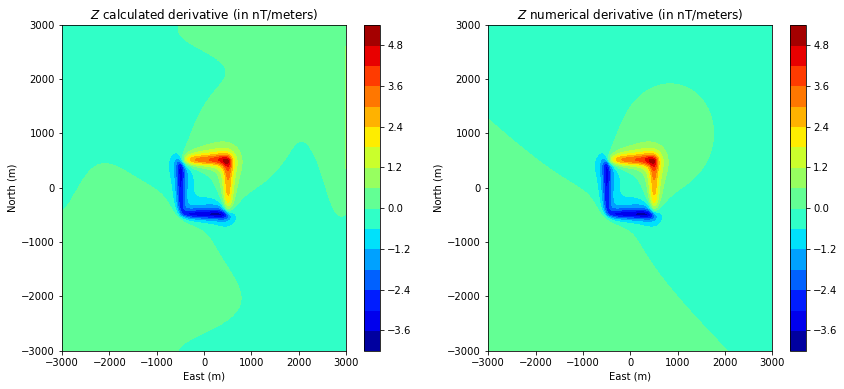

In [11]:
# Plotting the results for y derivative
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title('$Z$ calculated derivative (in nT/meters)')
plt.contourf(Y, X, derivz, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('$Z$ numerical derivative (in nT/meters)')
plt.contourf(Y, X, diffz, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()

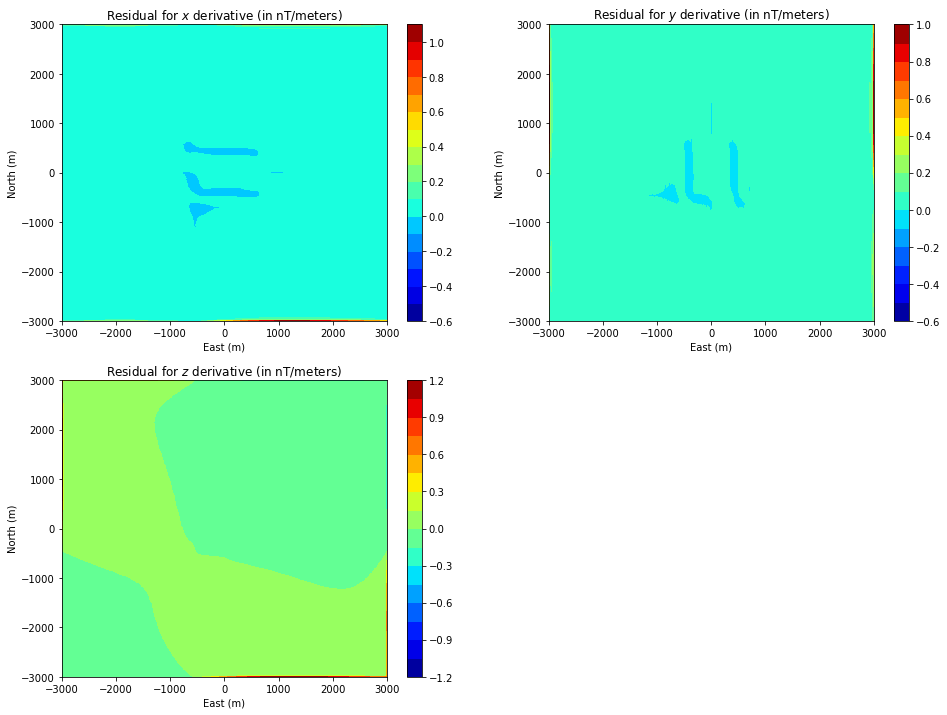

In [12]:
# Plotting the results for y derivative
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
plt.title('Residual for $x$ derivative (in nT/meters)')
plt.contourf(Y, X, diffx - derivx, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.title('Residual for $y$ derivative (in nT/meters)')
plt.contourf(Y, X, diffy - derivy, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.title('Residual for $z$ derivative (in nT/meters)')
plt.contourf(Y, X, diffz - derivz, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()

In [13]:
# Testing for horizontal gradient
hg_calc = np.sqrt(diffx**2 + diffy**2)
hg_four = np.sqrt(derivx**2 + derivy**2)

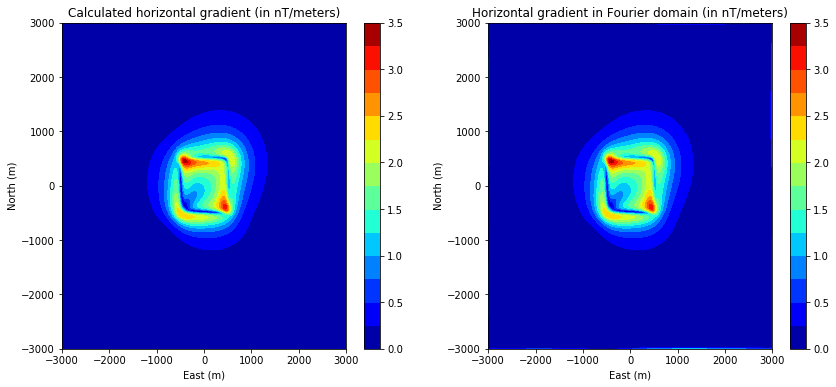

In [14]:
# Plotting the results for horizontal gradient
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title('Calculated horizontal gradient (in nT/meters)')
plt.contourf(Y, X, hg_calc, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Horizontal gradient in Fourier domain (in nT/meters)')
plt.contourf(Y, X, hg_four, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()

In [15]:
# Testing for total gradient
tg_calc = np.sqrt(diffx**2 + diffy**2 + diffz**2)
tg_four = np.sqrt(derivx**2 + derivy**2 + derivz**2)

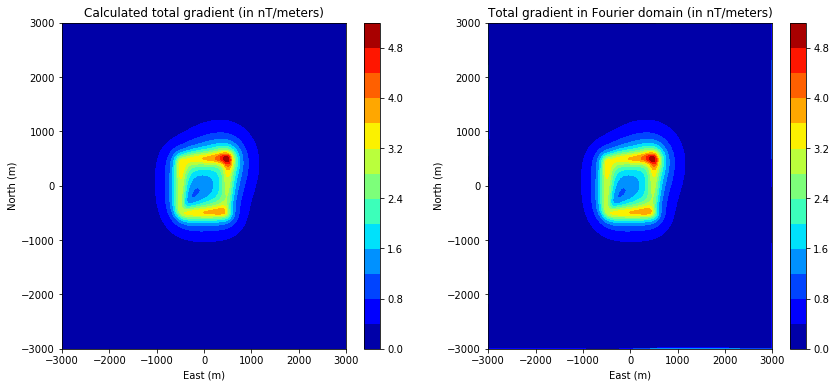

In [16]:
# Plotting the results for total gradient
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title('Calculated total gradient (in nT/meters)')
plt.contourf(Y, X, tg_calc, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Total gradient in Fourier domain (in nT/meters)')
plt.contourf(Y, X, tg_four, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()

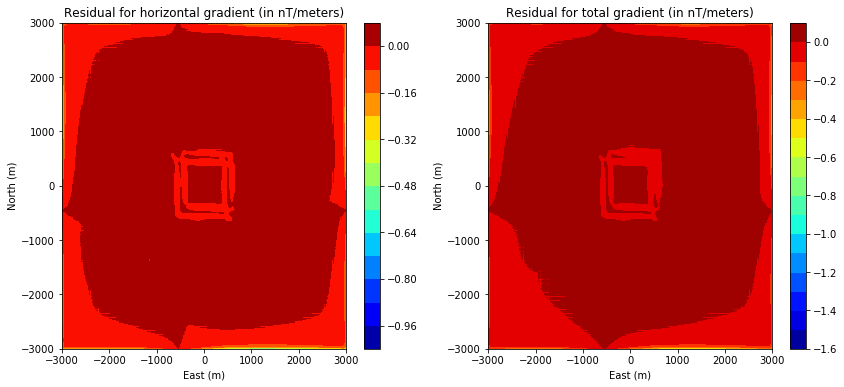

In [17]:
# Plotting the errors
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.title('Residual for horizontal gradient (in nT/meters)')
plt.contourf(Y, X, hg_calc - hg_four, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Residual for total gradient (in nT/meters)')
plt.contourf(Y, X, tg_calc - tg_four, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()